<a href="https://colab.research.google.com/github/gvikas79/AdvancedTimeseries/blob/master/CNN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [ ]:
dataset, dataset_info = tfds.load("malaria", with_info = True, shuffle_files = True)

In [ ]:
dataset

{'train': <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [ ]:
#train_dataset = dataset[0]
#val_dataset = dataset[1]
#test_dataset = dataset[2]

In [ ]:
#print(len(train_dataset))
#print(len(val_dataset))
#print(len(test_dataset))

In [ ]:
def split(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE= len(dataset)

  train_ds = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))
  val_test_ds = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_ds = val_test_ds.take(int(VAL_RATIO*DATASET_SIZE))
  test_ds = val_test_ds.skip(int(VAL_RATIO*DATASET_SIZE))

  return train_ds, val_ds, test_ds

In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
train_ds, val_ds, test_ds = split(dataset['train'], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)


In [ ]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

22046
2755
2757


In [ ]:
def get_label_str(label):
  if label == 0:
    return "Parasitized"
  else:
    return "Uninfected"

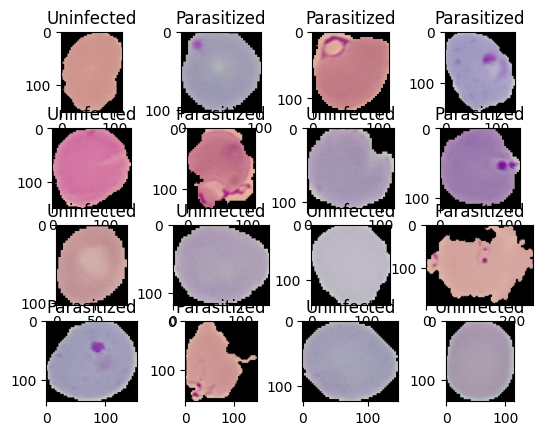

In [ ]:
for i, sample in enumerate(train_ds.take(16)):
  ax = plt.subplot(4, 4, i+1)
  plt.imshow(sample['image'])
  plt.title(get_label_str(sample['label'].numpy()))

In [ ]:
im_size = 224
BATCH_SIZE = 32

In [ ]:
def resize_rescale(inputs):
  return tf. image.resize(inputs['image'], (im_size, im_size))/255., inputs['label']

In [ ]:
train_dataset = train_ds.map(resize_rescale).shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_ds.map(resize_rescale).shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_ds.map(resize_rescale).shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

In [ ]:
np.unique(image)

array([0.0000000e+00, 2.4972958e-05, 2.5500556e-05, ..., 9.2956269e-01,
       9.3221337e-01, 9.3645275e-01], dtype=float32)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization

In [ ]:
model = tf.keras.Sequential([
                              InputLayer(input_shape = (im_size, im_size,3)),
                              Conv2D(filters =6, kernel_size = 5, strides = 1, padding = 'valid', activation = 'relu'),
                              BatchNormalization(),
                              MaxPool2D(pool_size=2, strides=2),
                              Conv2D(filters =16, kernel_size = 5, strides = 1, padding = 'valid', activation = 'relu'),
                              BatchNormalization(),
                              MaxPool2D(pool_size=2, strides=2),
                              Flatten(),
                              Dense(100, activation = 'relu'),
                              BatchNormalization(),
                              Dense(10, activation = 'relu'),
                              BatchNormalization(),
                              Dense(1, activation = 'sigmoid'),
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 batch_normalization (Batch  (None, 220, 220, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 6)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_1 (Bat  (None, 106, 106, 16)      64        
 chNormalization)                                                
                                                        

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1)
)

In [ ]:
history = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 100,
    verbose = 1
)

Epoch 1/100
689/689 [==============================] - 59s 78ms/step - loss: 0.5577 - val_loss: 0.6793
Epoch 2/100
689/689 [==============================] - 48s 69ms/step - loss: 0.3821 - val_loss: 0.3177
Epoch 3/100
689/689 [==============================] - 52s 75ms/step - loss: 0.3197 - val_loss: 0.3689
Epoch 4/100
688/689 [============================>.] - ETA: 0s - loss: 0.4014

KeyboardInterrupt: 